<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

-----

# FINAL PROJECT 3

**Kelompok 3 - PYTN-KS11**
1. M. Haikal Febrian
2. Naurah Nadzifah Azizi
3. Nadia Syachrani
4. Muhammad Randy

## Introduction

### Latar Belakang
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 di seluruh dunia, yang diperkirakan menewaskan 17,9 juta orang setiap tahunnya, yang merupakan 31% dari seluruh kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi yang berlaku di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada sebelumnya) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

### Data yang digunakan
* Dataset yang akan digunakan terdiri dari 299 baris dan 13 kolom. Analisis ini menggunakan dataset yang bersumber dari Kaggle dengan judul ["Heart Failure Prediction"](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). Dataset ini berisi sekumpulan fitur yang dapat digunakan untuk memprediksi kemungkinan terjadinya kematian akibat gagal jantung.
* Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

### Tujuan :
* Mengidentifikasi faktor-faktor yang memiliki pengaruh signifikan dalam memprediksi kemungkinan kematian akibat gagal jantung
* Memprediksi kemungkinan terjadinya kematian dengan mempertimbangkan faktor-faktor tersebut menggunakan metode ensemble

## Import Library
Melakukan import libraries yang digunakan dalam project ini

In [1]:
#untuk data prepocessing
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.tree as tree
import pydotplus 
from six import StringIO
from IPython.display import Image

#untuk encoding data categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#untuk splitting data into train and test
from sklearn.model_selection import train_test_split

#untuk membangun model
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#untuk evaluasi model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

#untuk mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

print('Libraries sudah siap')

Libraries sudah siap


## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana

In [2]:
# Melakukan loading dataset menggunakan library Pandas
df = pd.read_csv('heart_failure_clinical.csv')

In [3]:
# Melakukan pengaturan yakni tidak memberi batasan maksimal kolom yang ditampilkan
pd.set_option("display.max_columns", None)

In [4]:
# Melihat 5 baris teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset memiliki baris yang banyak yaitu 145460 baris, dan memiliki tipe data yang bervariasi yakni float dan integer.

In [6]:
# Memeriksa Jumlah Baris dan Kolom
print("Shape of the data:",df.shape)

Shape of the data: (299, 13)


In [7]:
# Memeriksa Nama Kolom
print("Columns Names are:\n",df.columns)

Columns Names are:
 Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [8]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', '\n', 'numerical: ', numerical)

categorical: [] 
 
 numerical:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


### Unique Values for each Column

In [9]:
# Melihat unique value pada setiap atribut
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


In [10]:
# Menampilkan Frekuensi Nilai di Setiap Kategori Fitur dan Jumlah Unik di Setiap Baris DataFrame
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
  
  
anaemia : 
0    170
1    129
Name: anaemia, dtype: int64
  
  
creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
  
  
diabetes : 
0    174
1    125
Name: diabetes, dtype: int64
  
  
ejection_fr

### Check for Class Imbalance

Target values counts:
 0    203
1     96
Name: DEATH_EVENT, dtype: int64


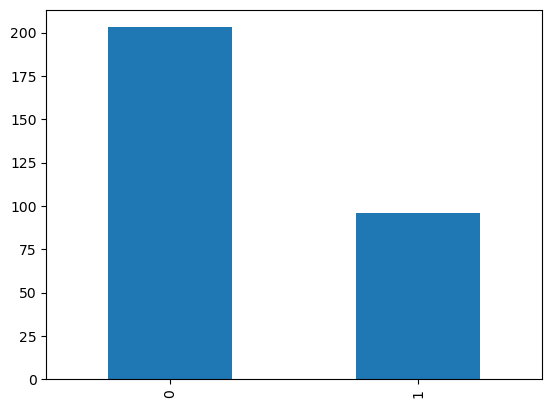

In [11]:
# Grafik Jumlah Data Target "RainTomorrow"
print("Target values counts:\n",df['DEATH_EVENT'].value_counts())
df['DEATH_EVENT'].value_counts().plot.bar()
plt.show()

Analisis : kategori orang yang tidak meninggal sebanyak 203 orang lebih banyak dibanding yang kategori orang yang meninggal yaitu hanya 96 orang

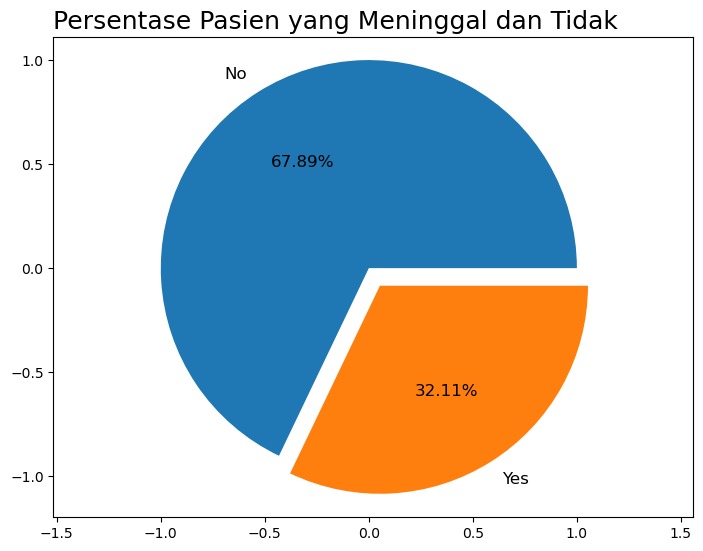

In [12]:
# Pie chart
labels = ["No", "Yes"]
explode = (0, 0.1)

# menggambarkan visualisasi
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['DEATH_EVENT'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Persentase Pasien yang Meninggal dan Tidak',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

Analisis : kedua kategori tersebut tidak seimbang, dimana nilai positif yaitu kategori yes/orang yang meninggal hanya sebesar 32,11% dibanding kategori no/orang yang tidak meninggal sebesar 67,89%

### Resampling Class Imbalance 
Under-sampling dilakukan ketika dataset tidak seimbang dan salah satu kelas target memiliki jumlah sampel yang jauh lebih sedikit. Hal ini dapat menyebabkan model menjadi bias dan berkinerja buruk pada kelas minoritas. Dengan mengurangi jumlah sampel pada kelas mayoritas menjadi seimbang dengan kelas minoritas, under-sampling dapat membantu mengurangi bias dan meningkatkan kinerja model pada kelas minoritas.

Target values counts after under-sampling:
 1    96
0    96
Name: DEATH_EVENT, dtype: int64


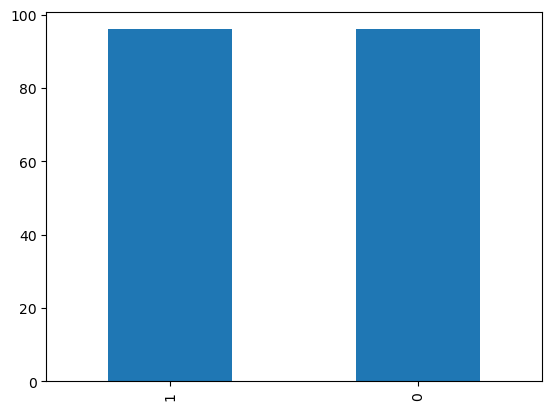

In [13]:
import random

# Mendapatkan indeks sampel kelas mayoritas dan kelas minoritas
majority_indices = df[df['DEATH_EVENT'] == 0].index
minority_indices = df[df['DEATH_EVENT'] == 1].index

# Menghitung jumlah sampel kelas mayoritas dan kelas minoritas
majority_count = len(majority_indices)
minority_count = len(minority_indices)

# Menentukan jumlah sampel yang akan dipilih dari kelas mayoritas
under_sample_size = minority_count

# Memilih secara acak subset dari sampel kelas mayoritas
random_majority_indices = random.sample(list(majority_indices), under_sample_size)

# Menggabungkan indeks kelas minoritas dengan indeks kelas mayoritas terpilih
under_sample_indices = minority_indices.union(random_majority_indices)

# Membuat set data dengan under-sampling
df = df.loc[under_sample_indices]

# Cetak jumlah sampel untuk setiap kelas target setelah under-sampling
print("Target values counts after under-sampling:\n", df['DEATH_EVENT'].value_counts())

# Plot jumlah sampel untuk setiap kelas target setelah under-sampling
df['DEATH_EVENT'].value_counts().plot.bar()
plt.show()


    Setelah dilakukan under-sampling, jumlah sampel pada kedua kelas target telah diseimbangkan menjadi 96 sampel. Hal ini dapat membantu model machine learning menjadi lebih objektif dan tidak bias terhadap satu kelas tertentu. Dengan kata lain, model yang dihasilkan dari dataset yang sudah diseimbangkan dapat berkinerja lebih baik dalam memprediksi kelas minoritas "Yes".

In [14]:
# Memeriksa Jumlah Baris dan Kolom
print("Shape of the data:",df.shape)

Shape of the data: (192, 13)


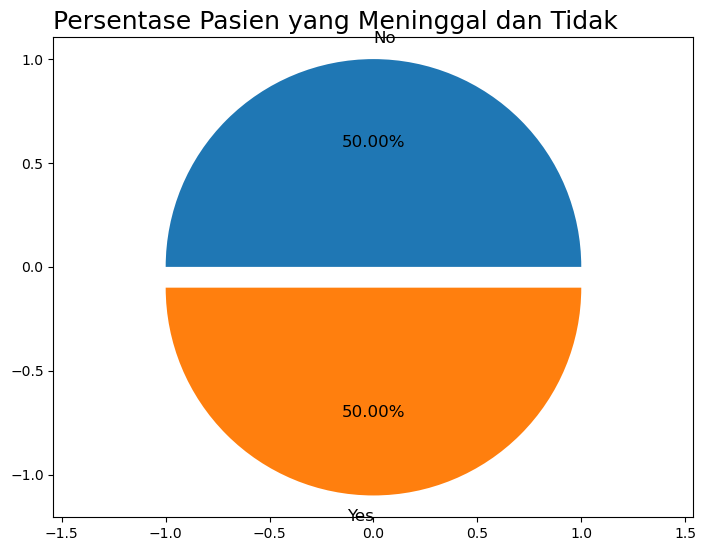

In [15]:
# Pie chart
labels = ["No", "Yes"]
explode = (0, 0.1)

# menggambarkan visualisasi
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['DEATH_EVENT'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Persentase Pasien yang Meninggal dan Tidak',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

    Analisis : kedua kategori tersebut sudah seimbang, dimana nilai positif yaitu kategori yes/orang meninggal sama dengan kategori no/orang yang tidak meninggal, nilainya sama-sama 50%

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

### Pengecekan Duplikasi Data
Pada tahap ini dilakukan untuk melihat apakah terdapat duplikasi data dalam dataset

In [16]:
# Melakukan pengecekan duplikasi data
print(df.duplicated())
print("Total Duplikasi Data :", df.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
291    False
293    False
295    False
296    False
297    False
Length: 192, dtype: bool
Total Duplikasi Data : 0


    Diperoleh tidak ada duplikasi data.

### Pengecekan Missing Value
Pada bagian ini akan dilakukan pengecekan terhadap missing value, kemudian missing value tersebut akan ditangani sesuai karakteristik dari data tersebut

In [17]:
# Check null values
print("Is there any null values in the data ? \n",df.isnull().values.any())

Is there any null values in the data ? 
 False


In [18]:
# Memeriksa missing value
print(df.isnull().sum())
print("Total Missing Values :", df.isnull().sum().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Total Missing Values : 0


    Dalam data ini, tidak terdapat missing value

### Menghapus variable yang tidak relevan
Menghilangkan atribut 'time' dikarenakan tidak relevan dengan variabel target. Waktu menunjukkan seberapa lama pasien dapat bertahan, sehingga atribut tersebut tidak cocok sebagai variabel independen, melainkan lebih cocok menjadi variabel target (untuk kasus yang lain)

In [19]:
# menghapus variabel time
df.drop(columns=['time'], inplace=True)

In [20]:
# Memeriksa Jumlah Baris dan Kolom
print("Shape of the data:",df.shape)

Shape of the data: (192, 12)


In [21]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       192 non-null    float64
 1   anaemia                   192 non-null    int64  
 2   creatinine_phosphokinase  192 non-null    int64  
 3   diabetes                  192 non-null    int64  
 4   ejection_fraction         192 non-null    int64  
 5   high_blood_pressure       192 non-null    int64  
 6   platelets                 192 non-null    float64
 7   serum_creatinine          192 non-null    float64
 8   serum_sodium              192 non-null    int64  
 9   sex                       192 non-null    int64  
 10  smoking                   192 non-null    int64  
 11  DEATH_EVENT               192 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 19.5 KB


    Setelah dihapus variabel time, data memiliki 192 baris serta 12 kolom. Data tersebut akan dipakai untuk pembuatan dan pengujian model

## Explorasi Data
Pada bagian ini akan dilakukan eksplorasi pada dataset untuk melihat karakteristik atau keadaan setiap variabel data berdasarkan visualisasi

In [22]:
# membagi menjadi 2 yaitu :
# fitur dengan nilai kategorikal
# fitur dengan nilai numerik
cate_val=[]
num_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        num_val.append(column)

In [23]:
cate_val

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [24]:
num_val

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

In [25]:
# Melihat statistik deskriptif pada data numerik
print('Description of Numeric Data : ')
num = df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])
num.describe()

Description of Numeric Data : 


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,61.649307,644.927083,37.015625,267547.325573,1.462656,136.437500
std,12.456871,1115.479642,12.626108,106707.384067,1.134290,4.702261
min,40.000000,23.000000,14.000000,47000.000000,0.500000,113.000000
25%,51.750000,115.000000,25.000000,210000.000000,1.000000,134.000000
50%,60.000000,255.500000,38.000000,262000.000000,1.100000,137.000000
75%,70.000000,582.000000,40.000000,308250.000000,1.700000,139.250000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000


    Diperoleh bahwa:
    * Terdapat 192 data pasien dengan rata-rata usia sebesar 60 tahun, rentang usia antara 40 hingga 95 tahun
    * Nilai maksimum variabel creatinine_phosphokinase (CPK) adalah 7861
    * Nilai minimum variabel platelets adalah 47000
    * Rata-rata kemampuan jantung untuk memompa darah ke seluruh tubuh (ejection fraction) adalah 35.70%
    * Rata-rata serum_creatinine adalah 1.46 mg/dL
    * Rata-rata serum_sodium adalah 136.43 mEq/Lt

In [26]:
# Melihat statistik descriptif pada data kategorik
print('Description of Categorical Data : ')
kat = df.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']).astype('category')
kat.describe()

Description of Categorical Data : 


,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,192,192,192,192,192,192
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,103,106,127,119,138,96


    Diperoleh bahwa:
    * Terdapat 103 pasien yang tidak menderita anemia.
    * Terdapat 106 pasien yang tidak menderita diabetes.
    * Terdapat 127 pasien yang tidak menderita tekanan darah tinggi.
    * Terdapat 119 pasien laki-laki
    * Terdapat 138 pasien yang tidak merokok.
    * Terdapat 96 pasien yang tidak meninggal.

In [27]:
# menghitung rata-rata usia pasien berdasarkan status kematian
mean = df[['age','DEATH_EVENT']].groupby('DEATH_EVENT').mean().sort_values(by='age', ascending=True)
mean

,age
DEATH_EVENT,
0,58.083333
1,65.215281


    Dari hasil tersebut, dapat dilihat bahwa rata-rata usia pasien yang selamat adalah 58 tahun, sedangkan rata-rata usia pasien yang meninggal adalah 65 tahun.

In [28]:
# melihat frekuensi pasien perokok dan bukan perokok yang meninggal atau tidak meninggal
pd.crosstab(df.smoking, df.DEATH_EVENT)

DEATH_EVENT,0,1
smoking,,
0,72,66
1,24,30


    Diperoleh bahwa:
    * Pasien yang tidak merokok dan hidup berjumlah 72
    * Pasien yang tidak merokok dan meninggal berjumlah 66
    * Pasien yang merokok dan hidup berjumlah 24
    * Pasien yang merokok dan meninggal berjumlah 30

    Dari tabel silang tersebut, dalam kelompok yang tidak merokok, persentase kematian adalah sekitar 47% (66 dari total 138 pasien tidak merokok). Sedangkan dalam kelompok yang merokok, persentase kematian adalah sekitar 55% (30 dari total 54 pasien merokok). Hal ini menunjukkan bahwa tingkat kematian cenderung lebih tinggi pada pasien yang merokok. Oleh karena itu, merokok dapat menjadi faktor risiko dalam kejadian kematian pada pasien dengan gagal jantung.

### Visualisasi Variabel

#### Boxplot

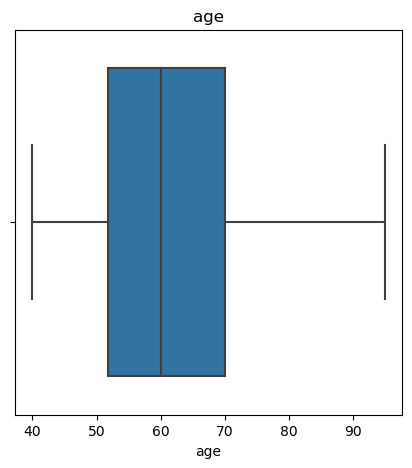

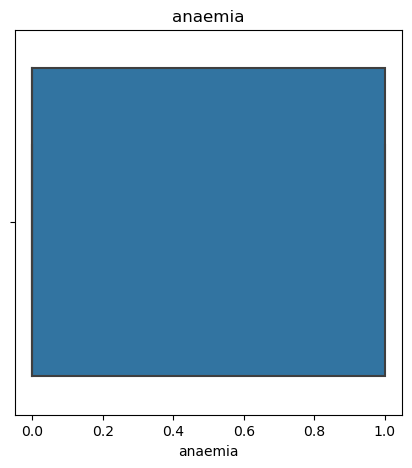

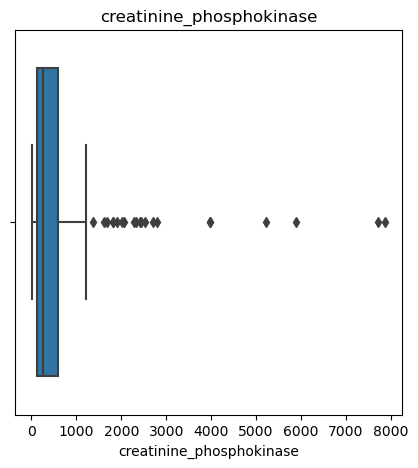

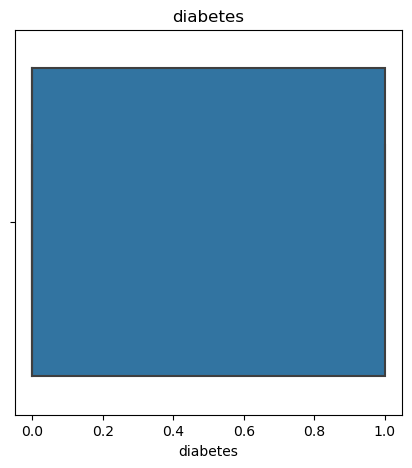

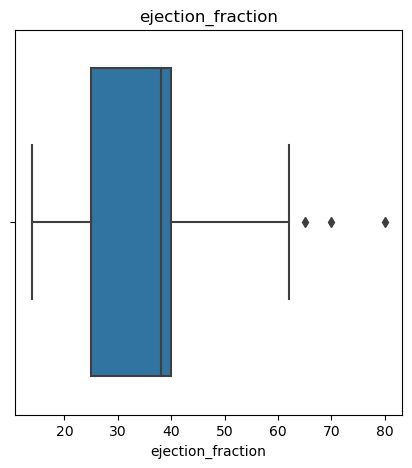

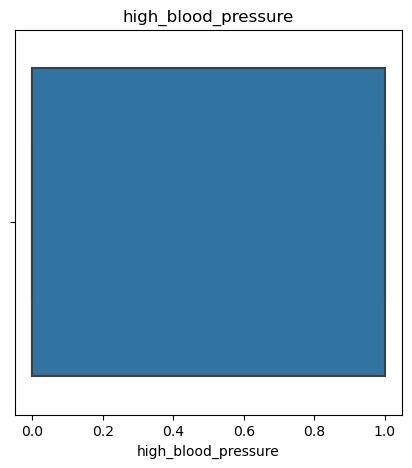

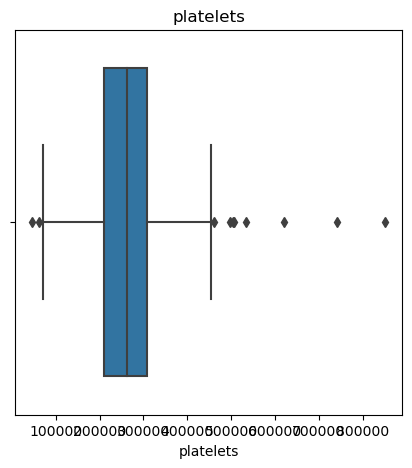

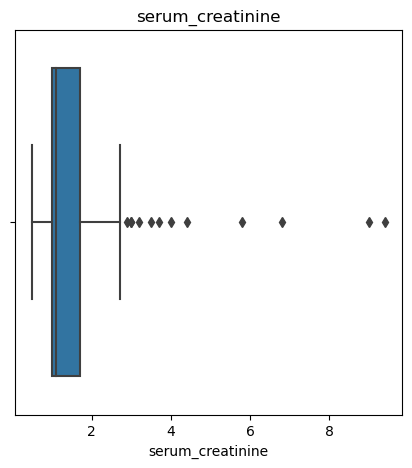

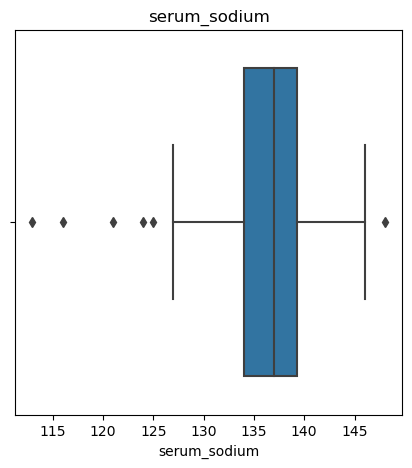

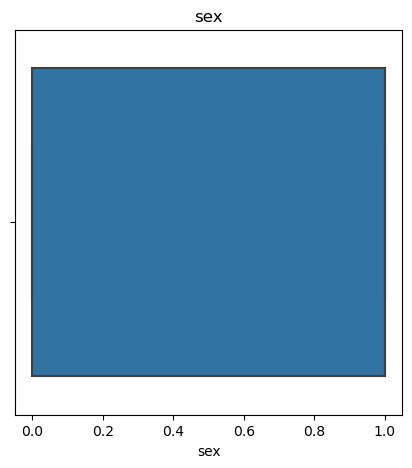

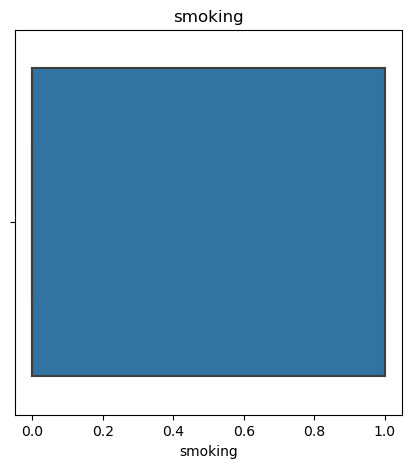

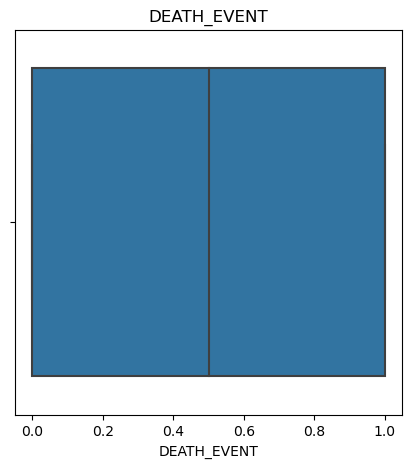

In [29]:
# visualisasi variabel dengan boxpllot
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

    Dari boxplot di atas, dapat disimpulkan bahwa hampir semua variabel memiliki nilai-nilai yang ekstrim (outliers). Oleh karena itu, akan dilakukan penanganan pada fitur-fitur yang memiliki outliers

#### Histogram

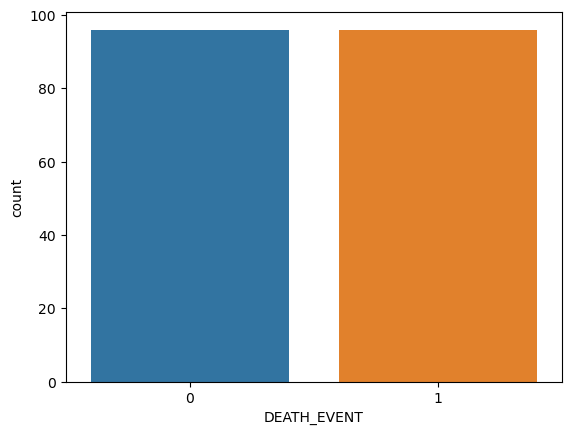

In [30]:
#visualisasi variabel DEATH_EVENT dengan histogram
sns.countplot(x="DEATH_EVENT", data=df)
plt.show()

    Dari grafik tersebut dapat dilihat bahwa jumlah pasien yang tidak mengalami kematian sama jumlahnya dengan pasien yang mengalami kematian.

([<matplotlib.axis.XTick at 0x14bd5f34490>,
 [Text(0, 0, 'Tidak Merokok'), Text(1, 0, 'Merokok')])

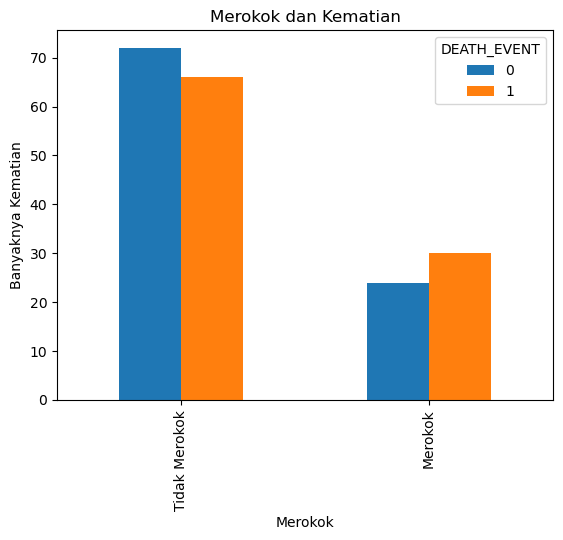

In [31]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind='bar')
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.title('Merokok dan Kematian')
plt.xticks(ticks=(0,1),labels=['Tidak Merokok','Merokok'])

    Diperoleh hasil bahwa jumlah pasien merokok yang meninggal paling sedikit dibandingkan perbandingan yang lain

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap of Heart Failure Prediction')

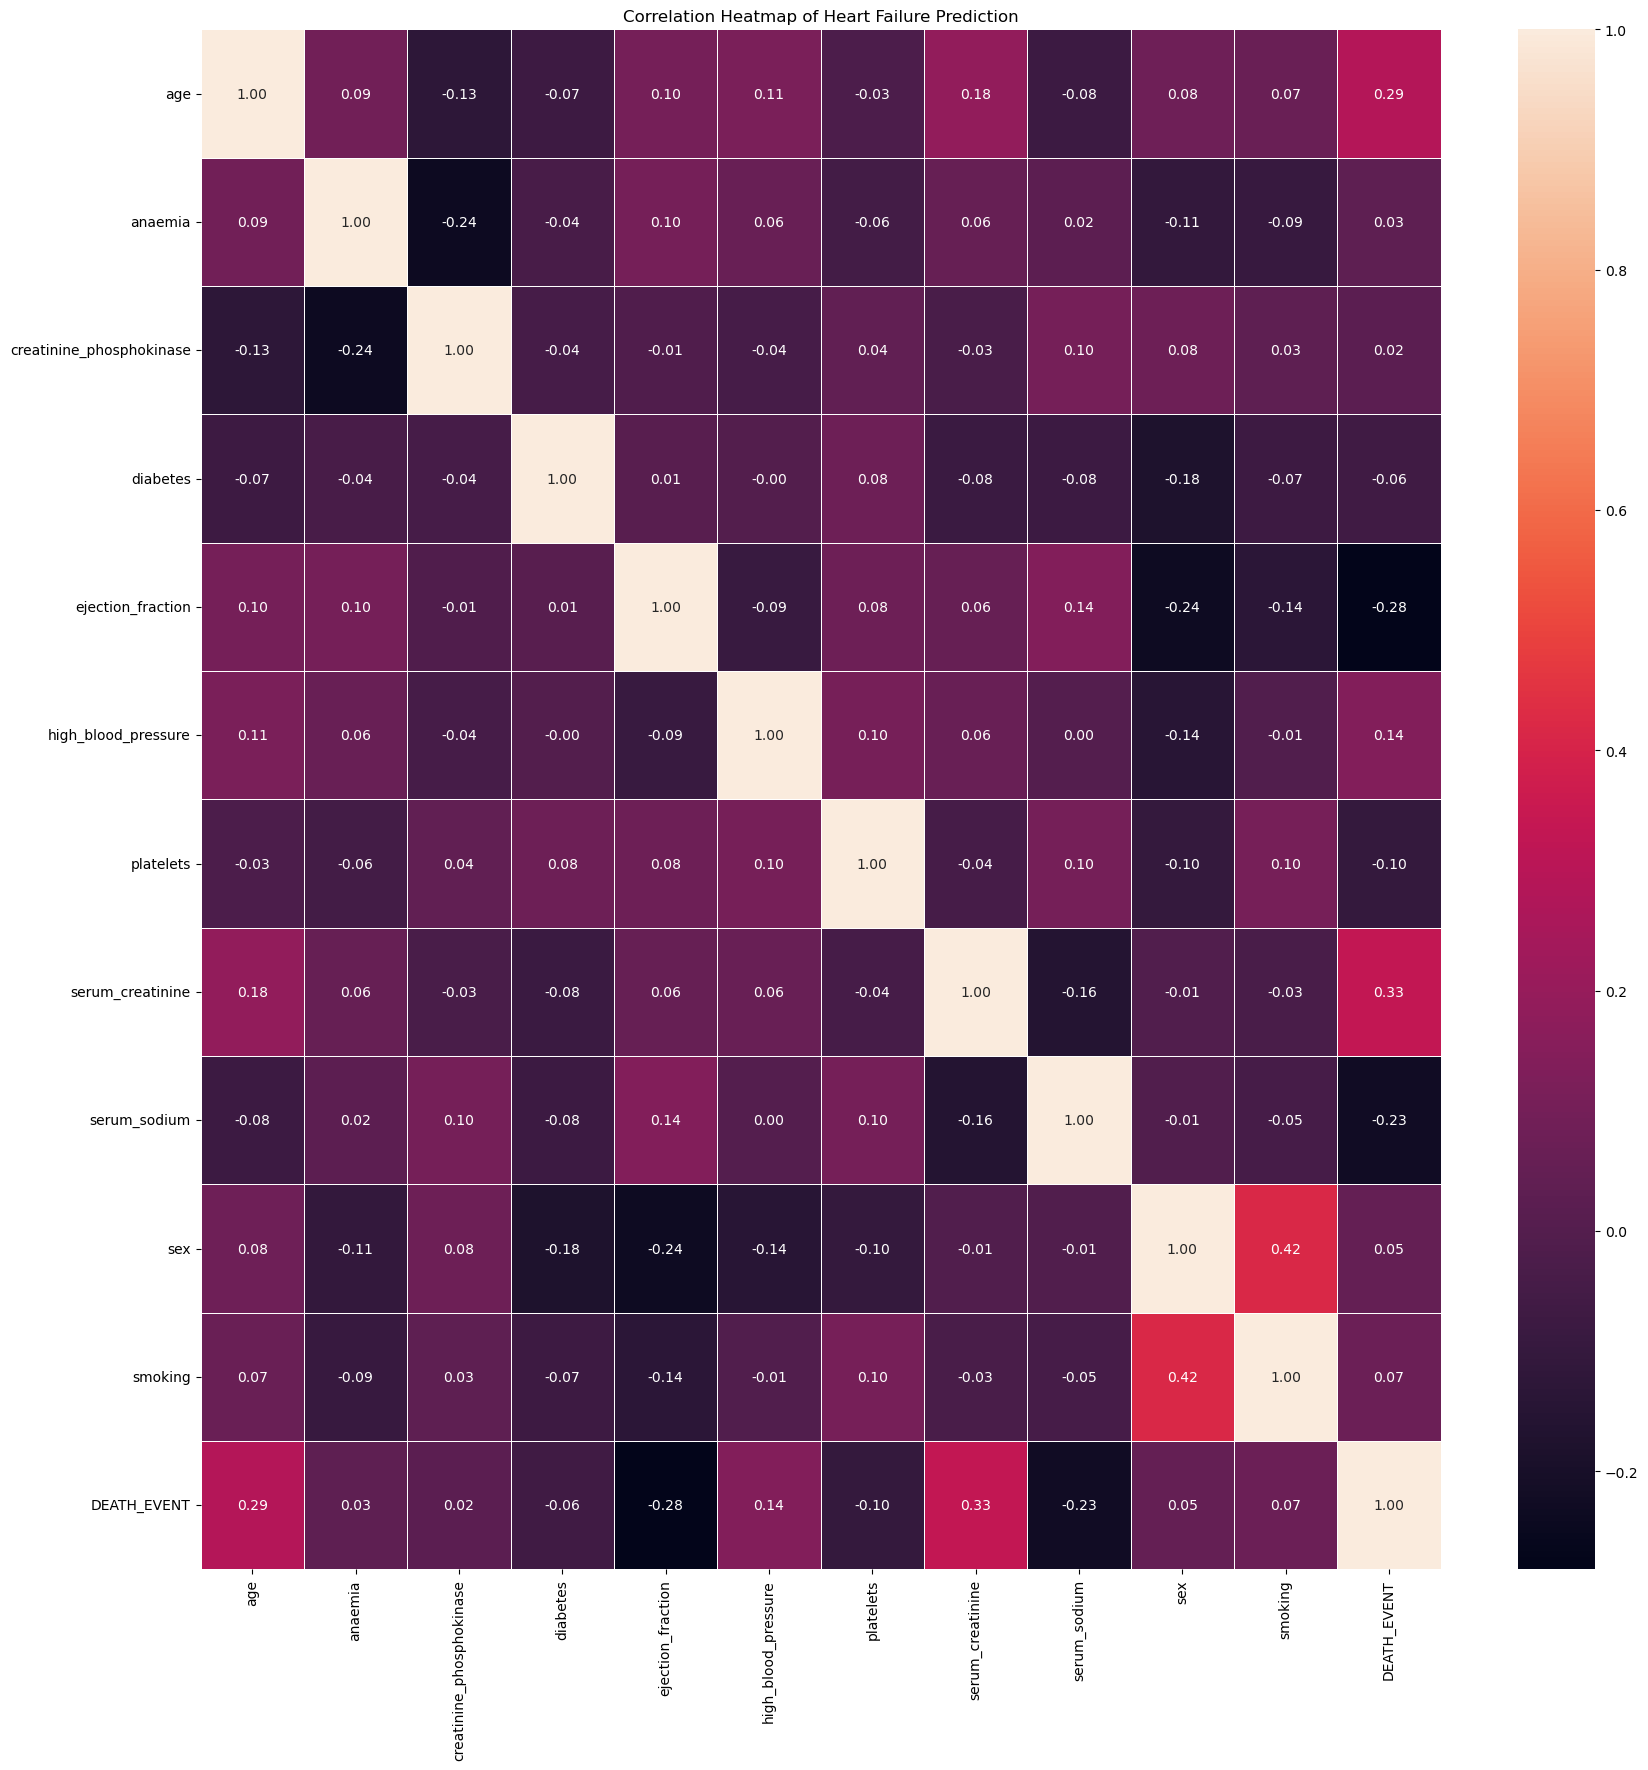

In [32]:
# Mengecek matrix korealsi 
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Heart Failure Prediction')

In [33]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mperingatan multikolinearitas di antaranya\033[0m {col} - {i}")
        else:
            print(f"Untuk {col} dan {i}, TIDAK ada masalah multikolinearitas") 

print("\033[1mJumlah fitur berkorelasi kuat:\033[0m", count) 

Untuk age dan age, TIDAK ada masalah multikolinearitas
Untuk age dan anaemia, TIDAK ada masalah multikolinearitas
Untuk age dan creatinine_phosphokinase, TIDAK ada masalah multikolinearitas
Untuk age dan diabetes, TIDAK ada masalah multikolinearitas
Untuk age dan ejection_fraction, TIDAK ada masalah multikolinearitas
Untuk age dan high_blood_pressure, TIDAK ada masalah multikolinearitas
Untuk age dan platelets, TIDAK ada masalah multikolinearitas
Untuk age dan serum_creatinine, TIDAK ada masalah multikolinearitas
Untuk age dan serum_sodium, TIDAK ada masalah multikolinearitas
Untuk age dan sex, TIDAK ada masalah multikolinearitas
Untuk age dan smoking, TIDAK ada masalah multikolinearitas
Untuk age dan DEATH_EVENT, TIDAK ada masalah multikolinearitas
Untuk anaemia dan age, TIDAK ada masalah multikolinearitas
Untuk anaemia dan anaemia, TIDAK ada masalah multikolinearitas
Untuk anaemia dan creatinine_phosphokinase, TIDAK ada masalah multikolinearitas
Untuk anaemia dan diabetes, TIDAK ada 

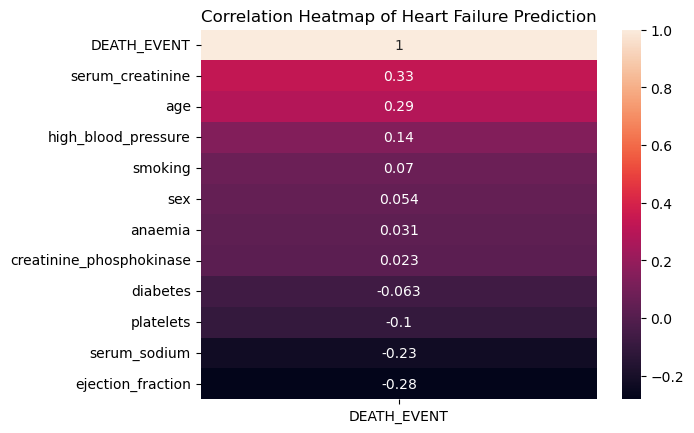

In [34]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

    Hasil analisis menunjukkan bahwa  : 
    * Variabel serum_creatinine, age, ejection_fraction, dan serum_sodium memiliki korelasi yang cukup kuat dengan variabel DEATH_EVENT.
    * Pada variabel ejection_fraction dan serum_sodium memiliki korelasi negatif dengan DEATH_EVENT
    * Pada variabel serum_creatinine dan age memiliki korelasi positif dengan DEATH_EVENT


## Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Handling Outliers

In [35]:
features_with_outliers = ["creatinine_phosphokinase","ejection_fraction",
                          "platelets","serum_creatinine","serum_sodium"]

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

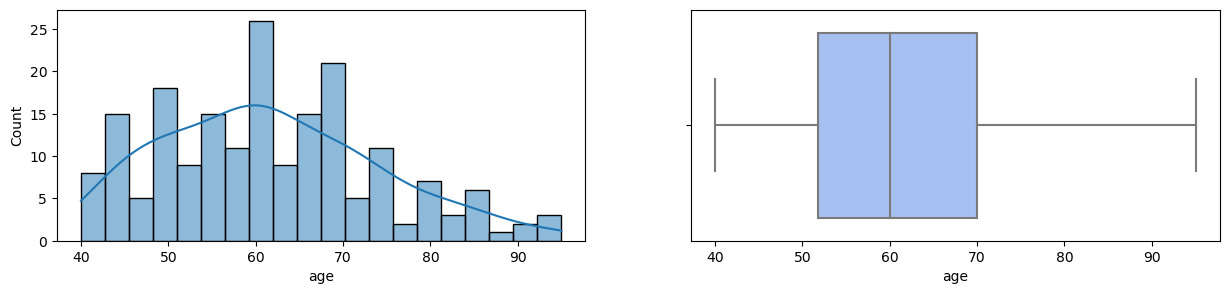

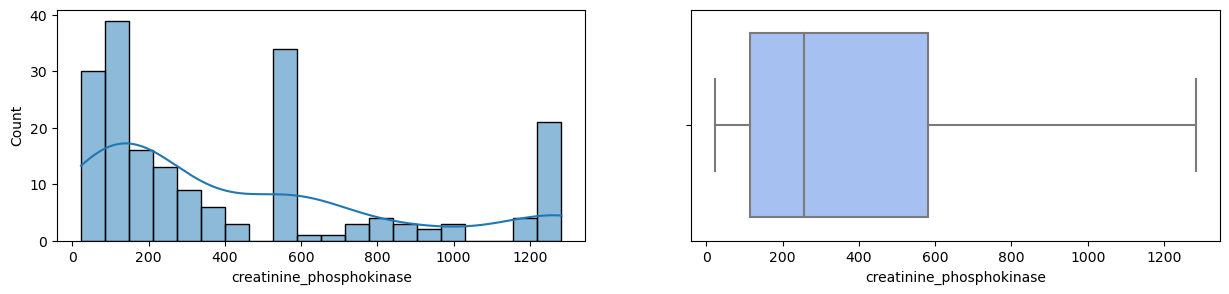

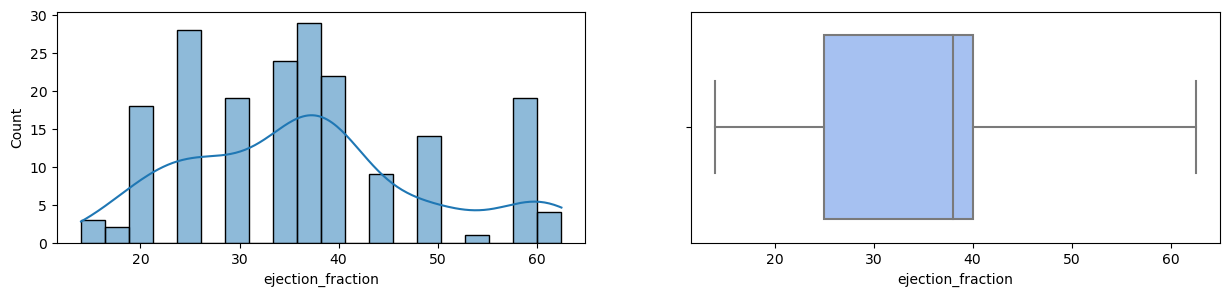

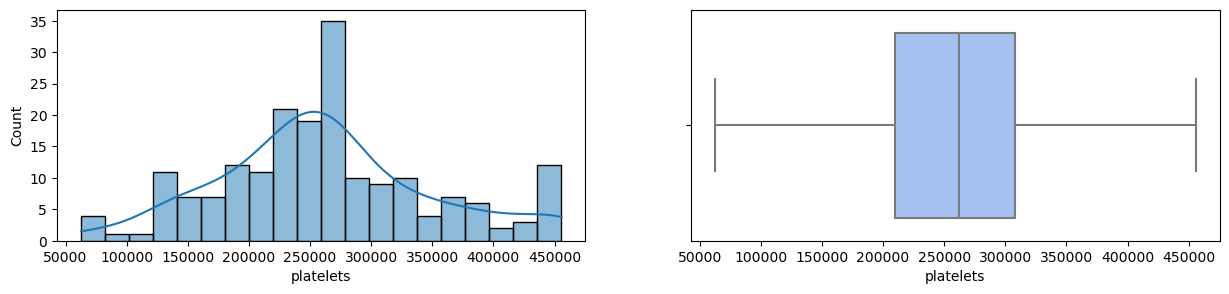

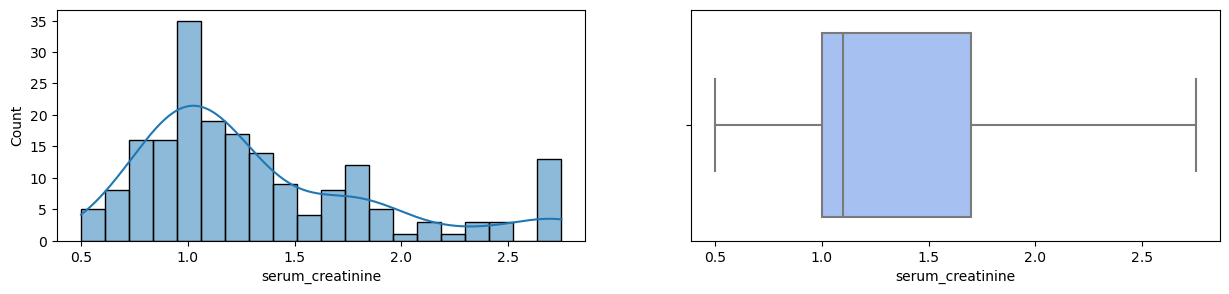

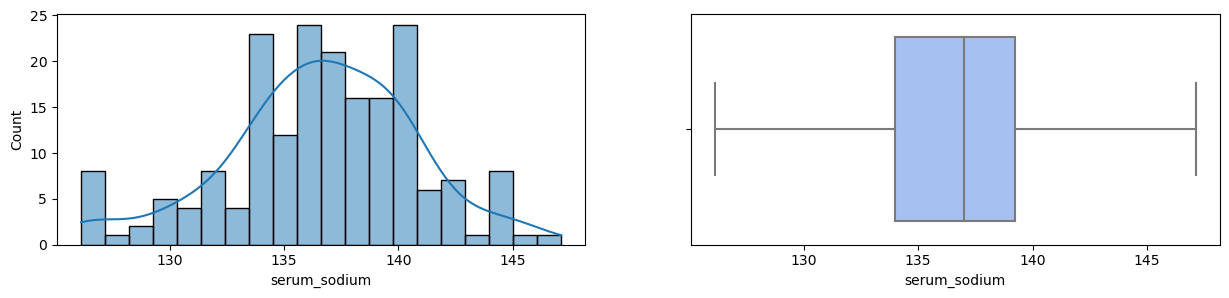

In [36]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction",
           "platelets","serum_creatinine","serum_sodium"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

    Pada visualisasi di atas bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik

### Data Splitting

In [37]:
# split X and y
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(192, 11)
(192,)


In [38]:
# splitting data into  20% data test dan 80% data train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [39]:
# check data types in X_train
X_train.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
dtype: object

### Feature Scaling

In [40]:
# Menerapkan Standard Scaler pada Data Train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.11162164,  1.0746765 , -0.96397704, ...,  0.78561237,
        -1.26222832, -0.60503837],
       [-0.14412421,  1.0746765 , -0.53291692, ...,  0.78561237,
         0.79224969, -0.60503837],
       [-0.65561591, -0.93051258,  0.35709544, ..., -0.68470803,
         0.79224969, -0.60503837],
       ...,
       [ 1.98709121,  1.0746765 , -0.86001548, ...,  0.29550557,
        -1.26222832, -0.60503837],
       [-0.91136176, -0.93051258,  0.35709544, ..., -0.68470803,
        -1.26222832, -0.60503837],
       [ 0.02637302, -0.93051258, -0.40613453, ..., -0.19460123,
        -1.26222832, -0.60503837]])

In [41]:
# Menerapkan Standard Scaler pada Data Test
X_test = scaler.transform(X_test)
X_test

array([[-0.39987006,  1.0746765 , -0.79155299, -0.91835369, -0.59796578,
        -0.71753152,  1.50300298, -0.58978225,  0.78561237, -1.26222832,
        -0.60503837],
       [ 0.28211888, -0.93051258, -0.69519838, -0.91835369, -0.59796578,
        -0.71753152, -0.08601616, -0.95022438,  0.29550557, -1.26222832,
        -0.60503837],
       [-1.50810208, -0.93051258, -0.90565714,  1.08890509,  0.21095345,
         1.39366699, -0.3664313 , -1.13044544,  0.54055897,  0.79224969,
        -0.60503837],
       [-1.16710761,  1.0746765 , -0.7864817 ,  1.08890509, -0.59796578,
         1.39366699, -0.26127562,  0.49154411, -1.66492162, -1.26222832,
        -0.60503837],
       [-0.99661038,  1.0746765 ,  2.13331668,  1.08890509, -0.19350617,
        -0.71753152, -2.23586558, -0.77000331,  1.27571916, -1.26222832,
        -0.60503837],
       [-0.57036729, -0.93051258,  1.9215901 , -0.91835369, -1.40688502,
        -0.71753152, -0.03509709,  0.90605255, -0.68470803,  0.79224969,
         1.652

## RANDOM FOREST
RandomForestClassifier merupakan pilihan ideal untuk dataset "Heart Failure Clinical Data" karena algoritma ini efektif dalam menangani fitur numerik dan kategorikal, mengatasi overfitting, dan dapat memberikan performa prediksi yang baik. Dengan menggunakan RandomForestClassifier, kita dapat membangun model prediksi yang akurat untuk memprediksi kegagalan jantung pada pasien dengan menggabungkan banyak pohon keputusan secara simultan, sehingga menghasilkan model yang stabil dan handal.

### Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Model pertama yakni model random forest classifier dengan n estimator 5, max depth 55

In [42]:
# Membangun model Random Forest
model_rf = RandomForestClassifier(max_depth=55, max_features=0.7, max_leaf_nodes=5, n_estimators=5, random_state=123)

In [43]:
param_grid = {'n_estimators': [25, 50, 75, 100], 
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9],
}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


### Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [45]:
# fitting model Random Forest
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=55, max_features=0.7, max_leaf_nodes=5,
                       n_estimators=5, random_state=123)

In [46]:
# Mengecek akuurasi model Random Forest dengan data train & test
print("Train score:", model_rf.score(X_train, y_train))
print("Test score:", model_rf.score(X_test, y_test))

Train score: 0.8104575163398693
Test score: 0.7692307692307693


    Dari hasil pelatihan dengan model Random Forest (RF), didapatkan nilai akurasi sebesar 0.8105 pada train set dan 0.7692 pada test set. Nilai tersebut menunjukkan bahwa model Random Forest memiliki performa yang cukup baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung berdasarkan fitur-fitur yang ada.

In [47]:
# Mengecek akuurasi model Random Forest dengan data train & testc - grid search
print("Train score:", grid_search.score(X_train, y_train))
print("Test score:", grid_search.score(X_test, y_test))

Train score: 0.8562091503267973
Test score: 0.7948717948717948


    Dari hasil pelatihan dengan model Random Forest (RF) dengan menggunakan grid search, didapatkan nilai akurasi sebesar 0.8562 pada train set dan 0.7949 pada test set. Nilai tersebut menunjukkan bahwa model Random Forest memiliki performa yang cukup baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung berdasarkan fitur-fitur yang ada.

### Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

#### model_rf

In [48]:
# Memeriksa Model data test prediksi RF
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [49]:
# Memeriksa skor akurasi test set Model RF
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy score Test - Model RF: {0:0.4f}'. format(acc_rf))

Accuracy score Test - Model RF: 0.7692


In [50]:
# Kinerja Metrik untuk Model RF
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.82      0.78      0.80        23

    accuracy                           0.77        39
   macro avg       0.76      0.77      0.76        39
weighted avg       0.77      0.77      0.77        39



Berdasarkan ringkasan evaluasi model random forest yang diberikan, dapat diambil kesimpulan sebagai berikut:
* Akurasi model adalah sebesar 0.7692, artinya model dapat memprediksi dengan benar sekitar 76,92% dari total data yang ada.
* Presisi model adalah sebesar 0.82, artinya dari semua prediksi positif yang dilakukan oleh model, sekitar 82% di antaranya adalah benar positif.
* Recall model adalah sebesar 0.78, artinya dari semua nilai aktual positif yang ada, model dapat mengidentifikasi sekitar 78% di antaranya sebagai hasil prediksi positif.
* F1 score model adalah sebesar 0.80, yang merupakan harmonic mean antara precision dan recall. Semakin tinggi nilai F1 score, semakin baik pula kinerja model dalam melakukan prediksi.

#### GridSearchCV

In [51]:
# Memeriksa Model data test prediksi RF
y_pred_gridrf = grid_search.predict(X_test)
y_pred_gridrf

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [52]:
# Memeriksa skor akurasi test set Model RF
acc_gridrf = accuracy_score(y_test, y_pred_gridrf)
print('Accuracy score Test - Model RF: {0:0.4f}'. format(acc_gridrf))

Accuracy score Test - Model RF: 0.7949


In [53]:
# Memeriksa confusion matrix Model RF
matrix_rf = confusion_matrix(y_test, y_pred_gridrf)
print('Confusion matrix\n', matrix_rf)

print('\nTrue Positives(TP) = ', matrix_rf[0,0])

print('\nTrue Negatives(TN) = ', matrix_rf[1,1])

print('\nFalse Positives(FP) = ', matrix_rf[0,1])

print('\nFalse Negatives(FN) = ', matrix_rf[1,0])

Confusion matrix
 [[11  5]
 [ 3 20]]

True Positives(TP) =  11

True Negatives(TN) =  20

False Positives(FP) =  5

False Negatives(FN) =  3


<AxesSubplot:>

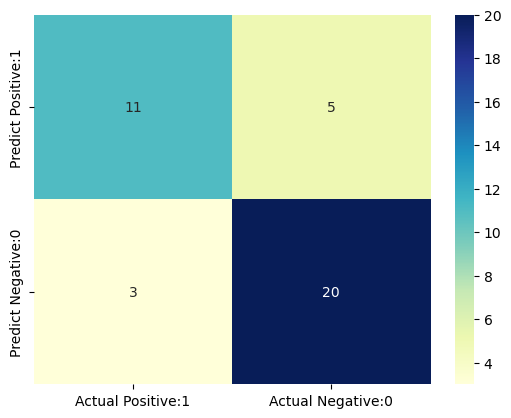

In [54]:
# Memvisualisasikan confusion matrix dengan peta panas seaborn
matrix_rf = pd.DataFrame(data=matrix_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='YlGnBu')

confusion matrix diatas menunjukkan `11 + 20 = 31 prediksi benar` and `5 + 3 = 8 prediksi salah`.

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 11

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 20

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 5 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3 `(Type II error)`

In [55]:
# Kinerja Metrik untuk Model RF
print(classification_report(y_test, y_pred_gridrf))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.80      0.87      0.83        23

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



In [56]:
print('Ringkasan Evaluasi Model RF')
print('Akurasi : {0:0.4f}'. format(acc_gridrf))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_gridrf)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_gridrf)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_gridrf)))

Ringkasan Evaluasi Model RF
Akurasi : 0.7949
Presisi : 0.8000
Recall : 0.8696
F1 Score : 0.8333


Berdasarkan ringkasan evaluasi model random forest yang diberikan, dapat diambil kesimpulan sebagai berikut:
* Akurasi model adalah sebesar 0.7949, artinya model dapat memprediksi dengan benar sekitar 79,49% dari total data yang ada.
* Presisi model adalah sebesar 0.8000, artinya dari semua prediksi positif yang dilakukan oleh model, sekitar 80,00% di antaranya adalah benar positif.
* Recall model adalah sebesar 0.8696, artinya dari semua nilai aktual positif yang ada, model dapat mengidentifikasi sekitar 86,96% di antaranya sebagai hasil prediksi positif.
* F1 score model adalah sebesar 0.8333, yang merupakan harmonic mean antara precision dan recall. Semakin tinggi nilai F1 score, semakin baik pula kinerja model dalam melakukan prediksi.

In [57]:
# Menyesuaikan tingkat ambang batas
# cetak 10 probabilitas prediksi pertama dari dua kelas- 0 dan 1
y_pred_prob_rf = grid_search.predict_proba(X_test)[0:10]

# Menyimpan probabilitas dalam kerangka data
y_predprob_rf_df = pd.DataFrame(data=y_pred_prob_rf, columns=['Prob of - No Death (0)', 'Prob of - Death (1)'])
y_predprob_rf_df

,Prob of - No Death (0),Prob of - Death (1)
0,0.557231,0.442769
1,0.464749,0.535251
2,0.829866,0.170134
3,0.456272,0.543728
4,0.810924,0.189076
5,0.072015,0.927985
6,0.214728,0.785272
7,0.159497,0.840503
8,0.149718,0.850282
9,0.071295,0.928705


**Analisis :**
* Dari tabel tersebut, terdapat 10 data yang dianalisis dengan dua kemungkinan hasil yaitu meninggal (1) dan tidak meninggal (0). 
* Sebagai contoh, baris pertama menunjukkan bahwa probabilitas tidak meninggal adalah 0,5572 dan probabilitas meninggal adalah 0,4428.
* Probabilitas untuk tidak meninggal (0) hampir semua data berada di atas 20%, dengan nilai tertinggi mencapai 81.09% pada baris ke-5. Hal ini menunjukkan bahwa kemungkinan besar orang tidak meninggal.
* Namun, pada beberapa data, terdapat probabilitas meninggal yang cukup signifikan seperti pada baris ke-6 yang memiliki probabilitas kematian mencapai 92.80%. 
* Oleh karena itu, perlu diperhatikan bahwa ada kemungkinan tidak meninggal pada beberapa data tersebut.
* Kesimpulan dari tabel tersebut adalah model memberikan estimasi probabilitas untuk setiap kelas dengan cukup baik

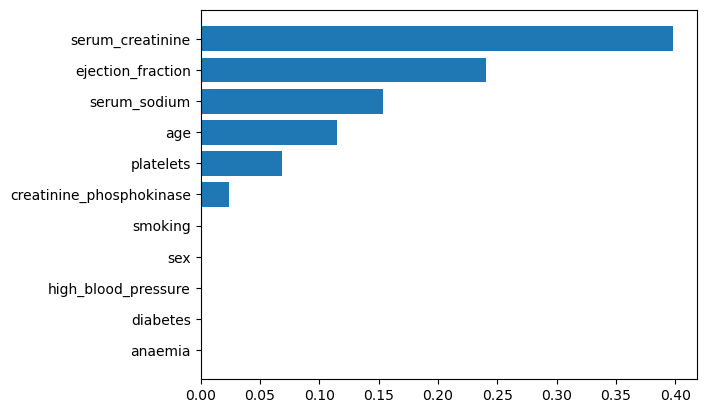

In [58]:
f_i = list(zip(df,model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i], [x[1] for x in f_i])

plt.show()

'platelets','creatinine_phosphokinase','smoking','sex','high_blood_pressure','diabetes','anaemia', memiliki feature importance terkecil jadi perlu di hapus

In [59]:
# menghapus variabel terkecil
df.drop(columns=['platelets','creatinine_phosphokinase','smoking','sex','high_blood_pressure','diabetes','anaemia'], inplace=True)

Text(0, 0.5, 'Frequency')

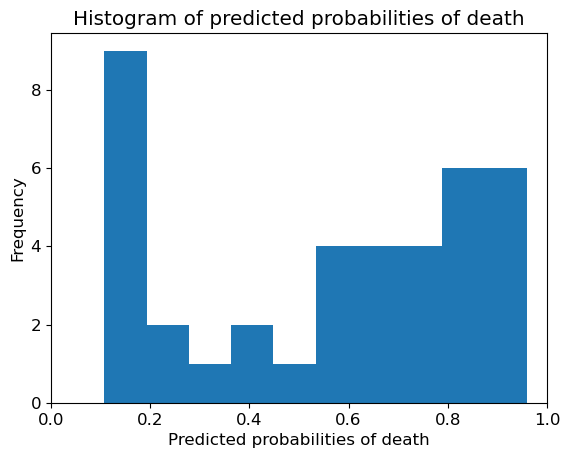

In [60]:
# plot histogram dari probabilitas yang diprediksi

# menyimpan probabilitas yang diprediksi untuk kelas 1 - Probabilitas kematian
y_pred1_rf = grid_search.predict_proba(X_test)[:, 1]

# Menyesuaikan ukuran font
plt.rcParams['font.size'] = 12

# plot histogram dengan 10 bins
plt.hist(y_pred1_rf, bins = 10)

# Mengatur judul probabilitas yang diprediksi
plt.title('Histogram of predicted probabilities of death')

# Mengatur batas sumbu x
plt.xlim(0,1)

# Mengatur judul
plt.xlabel('Predicted probabilities of death')
plt.ylabel('Frequency')

    Analisis :
      * Probabilitas 0.1 terdapat 9 frekuensi, probabilitas 0.2 terdapat 2 frekuensi, probabilitas 0.3 terdapat 1 frekuensi, probabilitas 0.4 terdapat 2 frekuensi, dan probabilitas 0.9 terdapat 6 frekuensi.
      * Hal ini menunjukkan bahwa terdapat variasi probabilitas frekuensi pada model Random Forest yang perlu diperhatikan dalam analisis data.

In [61]:
print('Ringkasan Evaluasi Model RF')
print('Akurasi : {0:0.4f}'. format(acc_gridrf))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_gridrf)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_gridrf)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_gridrf)))

Ringkasan Evaluasi Model RF
Akurasi : 0.7949
Presisi : 0.8000
Recall : 0.8696
F1 Score : 0.8333


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 297
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                192 non-null    float64
 1   ejection_fraction  192 non-null    float64
 2   serum_creatinine   192 non-null    float64
 3   serum_sodium       192 non-null    float64
 4   DEATH_EVENT        192 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 9.0 KB


### Kesimpulan Model RF
1. Nilai akurasi model random forest sebesar 0,7949. Jadi, model melakukan pekerjaan yang sangat baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung.
2. Pengamatan dalam jumlah kecil memperkirakan bahwa ada orang meninggal. Mayoritas pengamatan memprediksi bahwa orang tidak meninggal.
3. Model tidak menunjukkan tanda-tanda overfitting.
4. Peningkatan max_depth, max_features, max_leaf_nodes, n_estimators menghasilkan akurasi test set yang lebih tinggi dan akurasi training set yang sedikit meningkat. Jadi, kita dapat menyimpulkan bahwa model yang lebih kompleks akan bekerja lebih baik.
5. Confusion matrix menunjukkan 31 prediksi benar dan 8 prediksi salah

## DECISSION TREE CLASSIFIER
DecisionTreeClassifier untuk dataset Heart Failure Clinical Data yang diberikan dapat memberikan keuntungan dalam hal interpretabilitas, deteksi fitur penting, kemampuan menangani hubungan nonlinear antara fitur dan target, serta skalabilitas dan kinerja yang cepat. Decision tree memberikan aturan keputusan yang mudah diinterpretasikan, membantu dalam pemahaman kondisi kesehatan dan identifikasi faktor risiko kegagalan jantung. Selain itu, model ini mampu menangani hubungan nonlinear yang kompleks dan memiliki kinerja yang cepat dalam pemrosesan data. Meskipun demikian, pemilihan model tetap perlu dipertimbangkan berdasarkan tujuan analisis dan karakteristik data yang ada.

### Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Model kedua yakni model decision tree classifier dengan nax depth 55

In [63]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_features=0.7, 
                                  max_leaf_nodes=5, max_depth=55, random_state=123)

### Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [64]:
# fitting Model Decission Tree
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=55, max_features=0.7,
                       max_leaf_nodes=5, random_state=123)

In [65]:
# Memeriksa keakuratan model Decission Tree dengan data train & test data
print("Train score:", model_dt.score(X_train, y_train))
print("Test score:", model_dt.score(X_test, y_test))

Train score: 0.7777777777777778
Test score: 0.7692307692307693


    Dari hasil pelatihan dengan model Decision Tree Classifier, didapatkan nilai akurasi sebesar 0.7777 pada train set dan 0.7692 pada test set. Nilai tersebut menunjukkan bahwa model DT memiliki performa yang cukup baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung berdasarkan fitur-fitur yang ada.

### Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

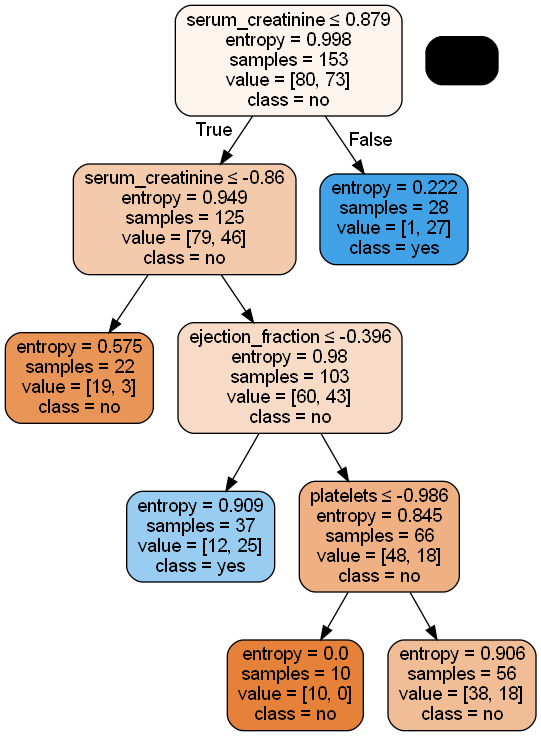

In [66]:
dot_data = export_graphviz(model_dt, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [67]:
# Memeriksa Model data test prediksi DT
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [68]:
# Memeriksa skor akurasi test set Model DT
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy score Test - Model DT: {0:0.4f}'. format(acc_dt))

Accuracy score Test - Model DT: 0.7692


In [69]:
# Memeriksa confusion matrix Model DT
matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion matrix\n', matrix_dt)

print('\nTrue Positives(TP) = ', matrix_dt[0,0])

print('\nTrue Negatives(TN) = ', matrix_dt[1,1])

print('\nFalse Positives(FP) = ', matrix_dt[0,1])

print('\nFalse Negatives(FN) = ', matrix_dt[1,0])

Confusion matrix
 [[14  2]
 [ 7 16]]

True Positives(TP) =  14

True Negatives(TN) =  16

False Positives(FP) =  2

False Negatives(FN) =  7


<AxesSubplot:>

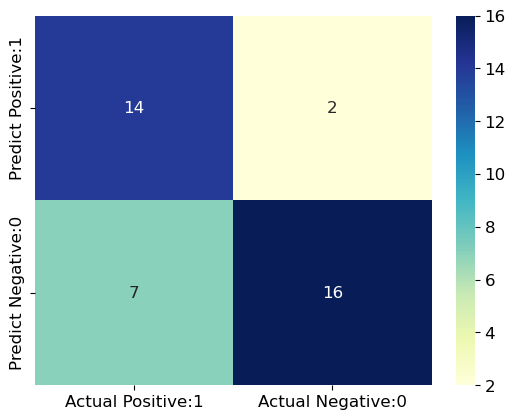

In [70]:
# Memvisualisasikan confusion matrix dengan hetamap seaborn
matrix_dt = pd.DataFrame(data=matrix_dt, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='YlGnBu')

confusion matrix diatas menunjukkan `14 + 16 = 30 prediksi benar` and `2 + 7 = 9 prediksi salah`.

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 14

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 16

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 7 `(Type II error)`

In [71]:
# Kinerja Metrik untuk Model DT
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        16
           1       0.89      0.70      0.78        23

    accuracy                           0.77        39
   macro avg       0.78      0.79      0.77        39
weighted avg       0.80      0.77      0.77        39



In [72]:
print('Ringkasan Evaluasi Model DT')
print('Akurasi : {0:0.4f}'. format(acc_dt))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_dt)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_dt)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_dt)))

Ringkasan Evaluasi Model DT
Akurasi : 0.7692
Presisi : 0.8889
Recall : 0.6957
F1 Score : 0.7805


Berdasarkan ringkasan evaluasi model decission tree yang diberikan, dapat diambil kesimpulan sebagai berikut:
* Akurasi model adalah sebesar 0.7692, artinya model dapat memprediksi dengan benar sekitar 76,92% dari total data yang ada.
* Presisi model adalah sebesar 0.8889, artinya dari semua prediksi positif yang dilakukan oleh model, sekitar 88,89% di antaranya adalah benar positif.
* Recall model adalah sebesar 0.6957, artinya dari semua nilai aktual positif yang ada, model dapat mengidentifikasi sekitar 69,57% di antaranya sebagai hasil prediksi positif.
* F1 score model adalah sebesar 0.7805, yang merupakan harmonic mean antara precision dan recall. Semakin tinggi nilai F1 score, semakin baik pula kinerja model dalam melakukan prediksi.

In [73]:
# Menyesuaikan tingkat ambang batas
# cetak 10 probabilitas prediksi pertama dari dua kelas- 0 dan 1
y_pred_prob_dt = model_dt.predict_proba(X_test)[0:10]

# Menyimpan probabilitas dalam kerangka data
y_predprob_dt_df = pd.DataFrame(data=y_pred_prob_dt, columns=['Prob of - No Death (0)', 'Prob of - Death (1)'])
y_predprob_dt_df

,Prob of - No Death (0),Prob of - Death (1)
0,0.324324,0.675676
1,0.863636,0.136364
2,0.863636,0.136364
3,0.324324,0.675676
4,1.000000,0.000000
5,0.035714,0.964286
6,1.000000,0.000000
7,0.324324,0.675676
8,0.678571,0.321429
9,0.035714,0.964286


**Analisis :**
* Dari tabel tersebut, terdapat 10 data yang dianalisis dengan dua kemungkinan hasil yaitu meninggal (1) dan tidak meninggal (0). 
* Sebagai contoh, baris pertama menunjukkan bahwa probabilitas tidak meninggal adalah 0,3243 dan probabilitas meninggal adalah 0,6757.
* Probabilitas untuk tidak meninggal (0) hampir semua data berada di atas 30%, dengan nilai tertinggi mencapai 100% pada data ke-4&6. Hal ini menunjukkan bahwa kemungkinan besar orang tidak meninggal.
* Namun, pada beberapa data, terdapat probabilitas meninggal yang cukup signifikan seperti pada data ke-5&9 yang memiliki probabilitas kematian mencapai 96,42%. 
* Oleh karena itu, perlu diperhatikan bahwa ada kemungkinan tidak meninggal pada beberapa data tersebut.
* Kesimpulan dari tabel tersebut adalah model memberikan estimasi probabilitas untuk setiap kelas dengan cukup baik

Text(0, 0.5, 'Frequency')

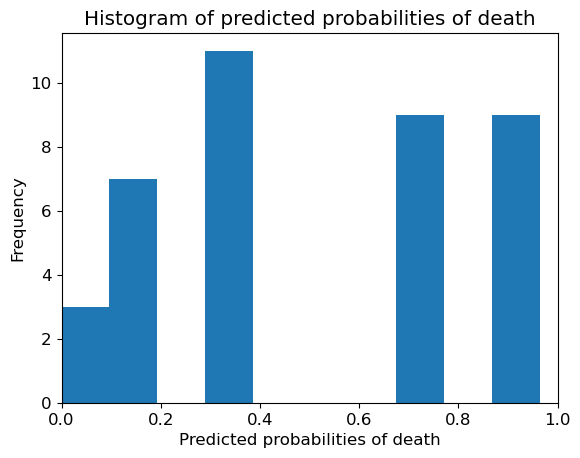

In [74]:
# plot histogram dari probabilitas yang diprediksi

# menyimpan probabilitas yang diprediksi untuk kelas 1 - Probabilitas kematian
y_pred1_dt = model_dt.predict_proba(X_test)[:, 1]

# Menyesuaikan ukuran font
plt.rcParams['font.size'] = 12

# plot histogram dengan 10 bins
plt.hist(y_pred1_dt, bins = 10)

# Mengatur judul probabilitas yang diprediksi
plt.title('Histogram of predicted probabilities of death')

# Mengatur batas sumbu x
plt.xlim(0,1)

# Mengatur judul
plt.xlabel('Predicted probabilities of death')
plt.ylabel('Frequency')

    Analisis :
      * Pada histogram telah dibuat, terdapat tiga probabilitas dan frekuensi yang berbeda.
      * Probabilitas dengan nilai 0.3 memiliki frekuensi tertinggi yaitu 11, sedangkan probabilitas dengan nilai 0.1 memiliki frekuensi terendah yaitu 3.
      * Hal ini menunjukkan bahwa probabilitas dengan nilai yang lebih tinggi cenderung memiliki frekuensi yang lebih tinggi juga.

### Kesimpulan Model DT
1. Nilai akurasi model decision tree sebesar 0,7692. Jadi, model melakukan pekerjaan yang sangat baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung.
2. Pengamatan dalam jumlah kecil memperkirakan bahwa ada orang meninggal. Mayoritas pengamatan memprediksi bahwa orang tidak meninggal.
3. Model tidak menunjukkan tanda-tanda overfitting.
4. Peningkatan max_depth, max_features, max_leaf_nodes, n_estimators menghasilkan akurasi test set yang lebih tinggi dan akurasi training set yang sedikit meningkat. Jadi, kita dapat menyimpulkan bahwa model yang lebih kompleks akan bekerja lebih baik.
5. Confusion matrix menunjukkan 30 prediksi benar dan 9 prediksi salah

## GRADIENT BOOSTING
GradientBoostingClassifier adalah pilihan yang optimal untuk dataset "Heart Failure Clinical Data" karena algoritma ini dapat mempelajari hubungan yang kompleks antara fitur dengan variabel target melalui penggabungan sekuensial dari pohon keputusan lemah. GradientBoostingClassifier mampu menangani fitur numerik dan kategorikal, mengatasi overfitting, dan memberikan performa prediksi yang tinggi. Dengan menggunakan GradientBoostingClassifier, kita dapat membangun model prediksi yang akurat untuk memprediksi kegagalan jantung pada pasien dengan kecepatan dan efisiensi yang tinggi.

### Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Model ketiga yakni model gradient boosting classifier dengan n estimator 5, max depth 55

In [75]:
model_gb = GradientBoostingClassifier(n_estimators=5, max_features=0.7, 
                                  max_leaf_nodes=5, max_depth=55, random_state=123)

### Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [76]:
# fitting Model Gradient Boosting
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=55, max_features=0.7, max_leaf_nodes=5,
                           n_estimators=5, random_state=123)

In [77]:
# Memeriksa keakuratan Model Gradient Boosting dengan data train & test data
print("Train score:", model_gb.score(X_train, y_train))
print("Test score:", model_gb.score(X_test, y_test))

Train score: 0.8431372549019608
Test score: 0.7948717948717948


    Dari hasil pelatihan dengan model Gradient Boosting (GB), didapatkan nilai akurasi sebesar 0.8431 pada train set dan 0.7949 pada test set. Nilai tersebut menunjukkan bahwa model GB memiliki performa yang cukup baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung berdasarkan fitur-fitur yang ada

### Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [78]:
# Memeriksa Model data test prediksi GB
y_pred_gb = model_gb.predict(X_test)
y_pred_gb

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [79]:
# Memeriksa skor akurasi test set Model GB
acc_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy score Test - Model RF: {0:0.4f}'. format(acc_gb))

Accuracy score Test - Model RF: 0.7949


In [80]:
# Memeriksa confusion matrix Model GB
matrix_gb = confusion_matrix(y_test, y_pred_gb)
print('Confusion matrix\n', matrix_gb)

print('\nTrue Positives(TP) = ', matrix_gb[0,0])

print('\nTrue Negatives(TN) = ', matrix_gb[1,1])

print('\nFalse Positives(FP) = ', matrix_gb[0,1])

print('\nFalse Negatives(FN) = ', matrix_gb[1,0])

Confusion matrix
 [[12  4]
 [ 4 19]]

True Positives(TP) =  12

True Negatives(TN) =  19

False Positives(FP) =  4

False Negatives(FN) =  4


<AxesSubplot:>

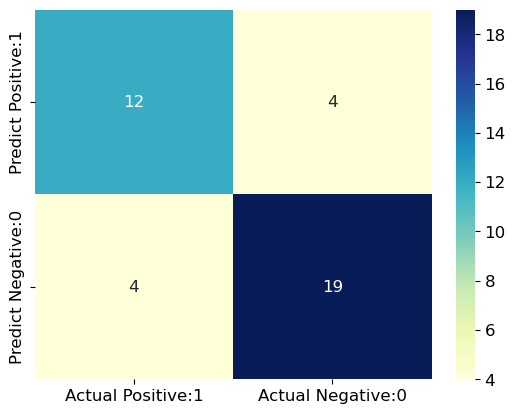

In [81]:
# Memvisualisasikan confusion matrix dengan peta panas seaborn
matrix_gb = pd.DataFrame(data=matrix_gb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix_gb, annot=True, fmt='d', cmap='YlGnBu')

confusion matrix diatas menunjukkan `12 + 19 = 31 prediksi benar` and `4 + 4 = 8 prediksi salah`.

In this case, we have
- `True Positives` (Actual Positive:1 and Predict Positive:1) - 12

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 19

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 4 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 4 `(Type II error)`

###### Kinerja Metrik untuk Model GB
print(classification_report(y_test, y_pred_gb))

In [82]:
print('Ringkasan Evaluasi Model GB')
print('Akurasi : {0:0.4f}'. format(acc_gb))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_gb)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_gb)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_gb)))

Ringkasan Evaluasi Model GB
Akurasi : 0.7949
Presisi : 0.8261
Recall : 0.8261
F1 Score : 0.8261


Berdasarkan ringkasan evaluasi model gradient boosting yang diberikan, dapat diambil kesimpulan sebagai berikut:
* Akurasi model adalah sebesar 0.7949, artinya model dapat memprediksi dengan benar sekitar 79,49% dari total data yang ada.
* Presisi model adalah sebesar 0.8261, artinya dari semua prediksi positif yang dilakukan oleh model, sekitar 82,61% di antaranya adalah benar positif.
* Recall model adalah sebesar 0.8261, artinya dari semua nilai aktual positif yang ada, model dapat mengidentifikasi sekitar 82,61% di antaranya sebagai hasil prediksi positif.
* F1 score model adalah sebesar 0.8261, yang merupakan harmonic mean antara precision dan recall. Semakin tinggi nilai F1 score, semakin baik pula kinerja model dalam melakukan prediksi.

In [83]:
# Menyesuaikan tingkat ambang batas
# cetak 10 probabilitas prediksi pertama dari dua kelas- 0 dan 1
y_pred_prob_gb = model_gb.predict_proba(X_test)[0:10]

# Menyimpan probabilitas dalam kerangka data
y_predprob_gb_df = pd.DataFrame(data=y_pred_prob_gb, columns=['Prob of - No Death (0)', 'Prob of - Death (1)'])
y_predprob_gb_df

,Prob of - No Death (0),Prob of - Death (1)
0,0.506218,0.493782
1,0.492443,0.507557
2,0.655716,0.344284
3,0.456755,0.543245
4,0.635535,0.364465
5,0.368949,0.631051
6,0.423538,0.576462
7,0.430461,0.569539
8,0.466498,0.533502
9,0.337242,0.662758


**Analisis :**
* Dari tabel tersebut, terdapat 10 data yang dianalisis dengan dua kemungkinan hasil yaitu meninggal (1) dan tidak meninggal (0). 
* Sebagai contoh, baris pertama menunjukkan bahwa probabilitas tidak meninggal adalah 0,5062 dan probabilitas meninggal adalah 0,4938.
* Probabilitas untuk tidak meninggal (0) semua data berada di atas 40%, dengan nilai tertinggi mencapai 65.57% pada data ke-2. Hal ini menunjukkan bahwa kemungkinan besar orang tidak meninggal.
* Namun, pada beberapa data, terdapat probabilitas meninggal yang cukup signifikan seperti pada data ke-9 yang memiliki probabilitas kematian mencapai 66.27%. 
* Oleh karena itu, perlu diperhatikan bahwa ada kemungkinan tidak meninggal pada beberapa data tersebut.
* Kesimpulan dari tabel tersebut adalah model memberikan estimasi probabilitas untuk setiap kelas dengan cukup baik

Text(0, 0.5, 'Frequency')

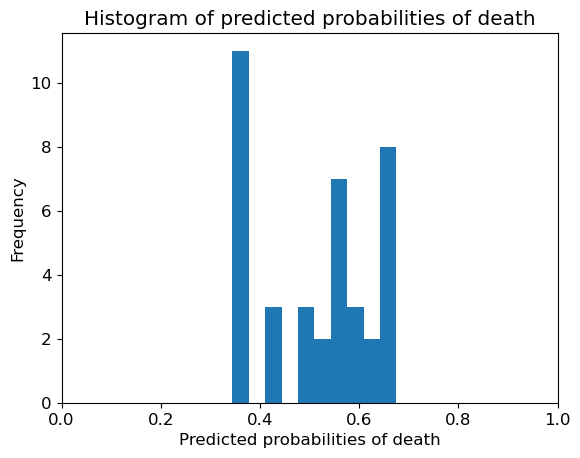

In [84]:
# plot histogram dari probabilitas yang diprediksi

# menyimpan probabilitas yang diprediksi untuk kelas 1 - Probabilitas kematian
y_pred1_gb = model_gb.predict_proba(X_test)[:, 1]

# Menyesuaikan ukuran font
plt.rcParams['font.size'] = 12

# plot histogram dengan 10 bins
plt.hist(y_pred1_gb, bins = 10)

# Mengatur judul probabilitas yang diprediksi
plt.title('Histogram of predicted probabilities of death')

# Mengatur batas sumbu x
plt.xlim(0,1)

# Mengatur judul
plt.xlabel('Predicted probabilities of death')
plt.ylabel('Frequency')

    Analisis :
    * Terdapat total 11 frekuensi dengan probabilitas 0.3, pada probabilitas 0.7 terdapat 8 frekuensi dan 0.5 dengan frekuensi 7 terhadap probabilitas kematian.

### Kesimpulan Model GB
1. Nilai akurasi model gradient boosting sebesar 0,7949. Jadi, model melakukan pekerjaan yang sangat baik dalam memprediksi kemungkinan terjadinya kematian akibat gagal jantung.
2. Pengamatan dalam jumlah kecil memperkirakan bahwa ada orang meninggal. Mayoritas pengamatan memprediksi bahwa orang tidak meninggal.
3. Model tidak menunjukkan tanda-tanda overfitting.
4. Peningkatan max_depth, max_features, max_leaf_nodes, n_estimators menghasilkan akurasi test set yang lebih tinggi dan akurasi training set yang sedikit meningkat. Jadi, kita dapat menyimpulkan bahwa model yang lebih kompleks akan bekerja lebih baik.
5. Confusion matrix menunjukkan 31 prediksi benar dan 8 prediksi salah

## Perbandingan Model

In [85]:
print('Ringkasan Evaluasi Model RF')
print('Akurasi : {0:0.4f}'. format(acc_rf))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_rf)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_rf)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_rf)))
print('\n')
print('Ringkasan Evaluasi Model DT')
print('Akurasi : {0:0.4f}'. format(acc_dt))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_dt)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_dt)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_dt)))
print('\n')
print('Ringkasan Evaluasi Model GB')
print('Akurasi : {0:0.4f}'. format(acc_gb))
print('Presisi : {0:0.4f}'. format(precision_score(y_test,y_pred_gb)))
print('Recall : {0:0.4f}'. format(recall_score(y_test,y_pred_gb)))
print('F1 Score : {0:0.4f}'. format(f1_score(y_test,y_pred_gb)))

Ringkasan Evaluasi Model RF
Akurasi : 0.7692
Presisi : 0.8182
Recall : 0.7826
F1 Score : 0.8000


Ringkasan Evaluasi Model DT
Akurasi : 0.7692
Presisi : 0.8889
Recall : 0.6957
F1 Score : 0.7805


Ringkasan Evaluasi Model GB
Akurasi : 0.7949
Presisi : 0.8261
Recall : 0.8261
F1 Score : 0.8261


    Dapat disimpulkan bahwa model Decision Tree dan Random Forest memiliki performa yang serupa dalam hal akurasi, namun Decision Tree memiliki nilai presisi yang sedikit lebih tinggi. Model Gradient Boosting memiliki performa yang sedikit lebih tonggo daripada model Decision Tree dan Random Forest dalam hal akurasi, racll, dan F1 Score. 

In [86]:
# Menyiapkan data evaluasi model
data = {
    'Model': ['Random Forest', 'Decission Trees', 'Gradient Boosting'],
    'Akurasi': [acc_rf, acc_dt, acc_gb],
    'Presisi': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_gb)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_gb)],
    'F1 Score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_gb)]
}

# Membuat DataFrame dari data
df_evaluasi = pd.DataFrame(data)

# Menampilkan tabel evaluasi model
print(df_evaluasi)

               Model   Akurasi   Presisi    Recall  F1 Score
0      Random Forest  0.769231  0.818182  0.782609  0.800000
1    Decission Trees  0.769231  0.888889  0.695652  0.780488
2  Gradient Boosting  0.794872  0.826087  0.826087  0.826087


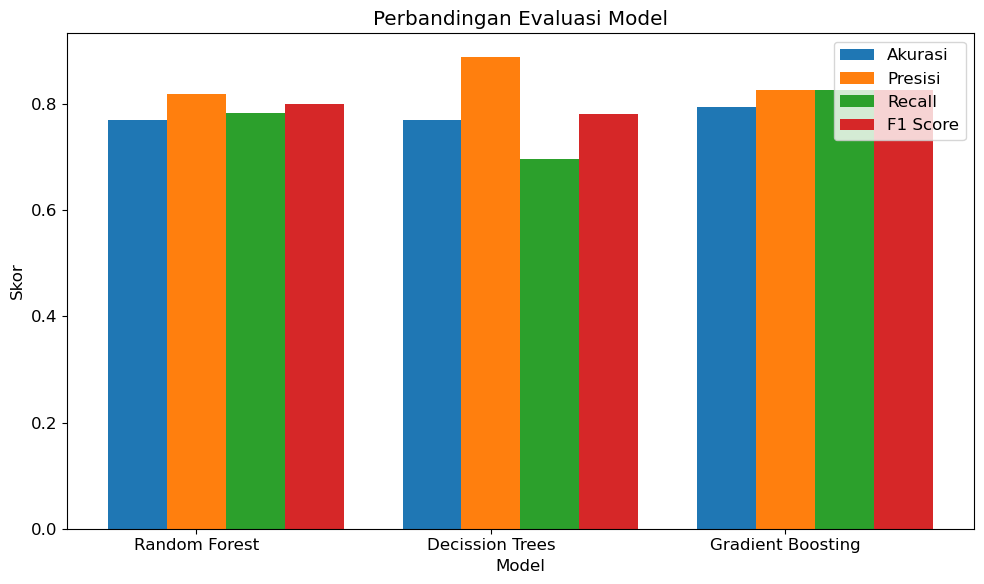

In [87]:
# Data evaluasi model
models = ['Random Forest', 'Decission Trees', 'Gradient Boosting']
accuracy = [acc_rf, acc_dt, acc_gb]
precision = [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_gb)]
recall = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_gb)]
f1_score = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_gb)]

# Mengatur lebar barplot
bar_width = 0.2

# Menentukan posisi x untuk tiap grup barplot
pos = np.arange(len(models))

# Menampilkan barplot perbandingan
plt.figure(figsize=(10, 6))
plt.bar(pos, accuracy, width=bar_width, label='Akurasi')
plt.bar(pos + bar_width, precision, width=bar_width, label='Presisi')
plt.bar(pos + (2 * bar_width), recall, width=bar_width, label='Recall')
plt.bar(pos + (3 * bar_width), f1_score, width=bar_width, label='F1 Score')

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Skor')
plt.title('Perbandingan Evaluasi Model')
plt.xticks(pos + bar_width, models)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [88]:
# buat array dengan nilai akurasi tiap model
accuracies = np.array([acc_rf, acc_dt, acc_gb])

# cari index dengan nilai akurasi tertinggi
max_index = np.argmax(accuracies)

# buat array dengan nama model
models = np.array(['Random Forest', 'Decission Trees', 'Gradient Boosting'])

# cetak nama model dengan akurasi tertinggi dan nilai akurasinya
print("Model dengan score tertinggi adalah", models[max_index], "dengan nilai score sebesar", accuracies[max_index])

Model dengan score tertinggi adalah Gradient Boosting dengan nilai score sebesar 0.7948717948717948


# CONCLUSION
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan terhadap EDA :

* Terdapat 192 data pasien dengan rata-rata usia sebesar 60 tahun, rentang usia antara 40 hingga 95 tahun
* Terdapat 103 pasien yang tidak menderita anemia.
* Terdapat 106 pasien yang tidak menderita diabetes.
* Terdapat 127 pasien yang tidak menderita tekanan darah tinggi.
* Terdapat 119 pasien laki-laki
* Terdapat 138 pasien yang tidak merokok.
* Terdapat 96 pasien yang tidak meninggal.

Dalam kelompok yang tidak merokok, persentase kematian adalah sekitar 47% (66 dari total 138 pasien tidak merokok). Sedangkan dalam kelompok yang merokok, persentase kematian adalah sekitar 55% (30 dari total 54 pasien merokok). Hal ini menunjukkan bahwa tingkat kematian cenderung lebih tinggi pada pasien yang merokok. Oleh karena itu, merokok dapat menjadi faktor risiko dalam kejadian kematian pada pasien dengan gagal jantung.

## Kesimpulan terhadap Model :

* Dapat disimpulkan bahwa model Decision Tree dan Random Forest memiliki performa yang serupa dalam hal akurasi, namun Decision Tree memiliki nilai presisi yang sedikit lebih tinggi. Model Gradient Boosting memiliki performa yang sedikit lebih tinggi daripada model Decision Tree dan Random Forest dalam hal akurasi, racll, dan F1 Score. 
* Akurasi RF dan DT : 0.7692 lebih kecil dibandingkan Akurasi GB : 0.7949
* Akurasi ketiga model tersebut berada pada nilai > 70%, sehingga untuk memprediksi kemungkinan terjadinya kematian akibat gagal jantung bisa menggunakan Random Forest, Decision Tree atau Gradient Boosting tergantung kebutuhan, karena keduanya menghasilkan tingkat akurasi model yang nilainya hampir sama
* Pada kasus ini, performa model Random Forest, Decisiion Tree, dan Gradient Boosting cukup seimbang antara data train dan test dengan perbedaan skor yang tidak terlalu jauh. Oleh karena itu, dapat dikatakan bahwa model ini tidak mengalami overfitting atau underfitting.
* Skor akurasi, presisi, recall dan f1 score model Random Forest, Decisiion Tree, dan Gradient Boosting sudah cukup baik (> 0.7)